In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:


IMG_SIZE = (224, 224)
BATCH_SIZE = 1
SEED = 42

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/chest_xray_sample/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    validation_split=0.2,
    subset="training",
    seed=SEED
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/chest_xray_sample/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    validation_split=0.2,
    subset="validation",
    seed=SEED
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/chest_xray_sample/test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    shuffle=False
)


Found 13 files belonging to 2 classes.
Using 11 files for training.
Found 13 files belonging to 2 classes.
Using 2 files for validation.
Found 4 files belonging to 2 classes.


In [4]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),

    data_augmentation,
    tf.keras.layers.Rescaling(1./255),

    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [6]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.BinaryCrossentropy(
        reduction="sum_over_batch_size"
    ),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name="accuracy"),
        tf.keras.metrics.AUC(name="auc")
    ]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
EPOCHS = 200

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        "pneumonia_cnn.keras",
        save_best_only=True
    )
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 345ms/step - accuracy: 0.8935 - auc: 0.7444 - loss: 0.4031 - val_accuracy: 0.5000 - val_auc: 0.0000e+00 - val_loss: 1.0624
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 259ms/step - accuracy: 0.8760 - auc: 0.7989 - loss: 0.4035 - val_accuracy: 0.5000 - val_auc: 0.0000e+00 - val_loss: 1.3067
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 419ms/step - accuracy: 0.8241 - auc: 0.7984 - loss: 0.3924 - val_accuracy: 0.5000 - val_auc: 0.0000e+00 - val_loss: 0.8754
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 233ms/step - accuracy: 0.6065 - auc: 0.7960 - loss: 0.4417 - val_accuracy: 0.5000 - val_auc: 0.0000e+00 - val_loss: 1.2278
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 244ms/step - accuracy: 0.6857 - auc: 0.9167 - loss: 0.3652 - val_accuracy: 0.5000 - val_auc: 0.0000e+00 - val_loss: 0.8895
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 293ms/step - accuracy: 0.7914 - auc: 0.9035 - loss: 0.3646 - val_accuracy: 0.5000 - val_auc: 0.0000e+00 - val_loss: 0.9485
Epoch 7/20

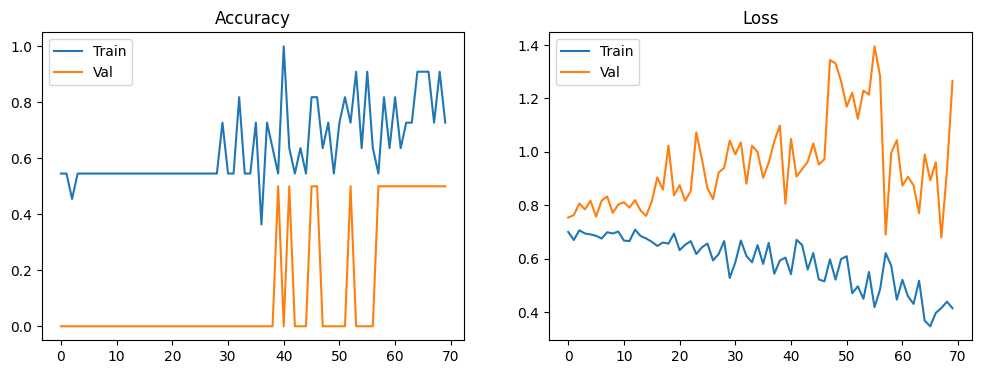

In [17]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Val")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Val")
plt.title("Loss")
plt.legend()

plt.show()

In [18]:
test_loss, test_acc, test_auc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7333 - auc: 0.6000 - loss: 0.6041
Test Accuracy: 0.7500
Test AUC: 1.0000


In [24]:
from tensorflow.keras.preprocessing import image
from PIL import Image

In [19]:
model = tf.keras.models.load_model(
    "/content/pneumonia_cnn.keras"
)

In [20]:
IMG_SIZE = (224, 224)

img_path = "/content/drive/MyDrive/chest_xray_sample/train/NEUMONIA/person14_virus_44.jpeg"  # change this

img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = img_array / 255.0          # Rescaling
img_array = np.expand_dims(img_array, axis=0)  # (1,

In [25]:
img = Image.open("/content/drive/MyDrive/chest_xray_sample/train/NEUMONIA/person14_virus_44.jpeg").convert("RGB")

# 2. Resize
img = img.resize(IMG_SIZE)

# 3. Convert to numpy
img_array = np.array(img) / 255.0

# 4. Add batch dimension
img_array = np.expand_dims(img_array, axis=0)




In [26]:
prediction = model.predict(img_array)
print("Raw prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Raw prediction: [[0.37687173]]


In [27]:
prob = prediction[0][0]

if prob >= 0.5:
    print(f"PNEUMONIA detected ({prob:.2%} confidence)")
else:
    print(f"NORMAL ({(1 - prob):.2%} confidence)")

NORMAL (62.31% confidence)
